<a href="https://colab.research.google.com/github/utkarsh-a113/Regression-Models/blob/main/regressionPCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression PCC

setups

In [28]:
!pip install keras~=3.13.0 matplotlib~=3.10.0 numpy~=2.0.0 pandas~=2.2.0   tensorflow

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


load dependencies

In [29]:
import numpy as np
import pandas as pd
#ml based
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px

loading data sets

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

reading the datasets

In [31]:
insurance_df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
training_df=insurance_df.loc[:,("age","bmi","children","charges")]
print('reading completed sucessfully')
print('total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

reading completed sucessfully
total number of rows: 1338




,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
195,19,30.590,0,1639.56310
196,39,32.800,0,5649.71500
197,45,28.600,2,8516.82900
198,51,18.050,0,9644.25250


In [32]:
from google.colab import sheets
sheet=sheets.InteractiveSheet(df=training_df)

https://docs.google.com/spreadsheets/d/1loQezNRD0FQr-sHBcilZM5xQh1o3SsxGa0QT2vWFOfY/edit#gid=0


In [33]:
#to view data sets
print('total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

total number of rows: 1338




,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Correlation Matrix

In [34]:
training_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The feature with strongest correlation to charges is age

In [35]:
px.scatter_matrix(training_df, dimensions=["age","bmi","charges"])

training the model

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

def create_model(input_dim):
    model = keras.Sequential([
        layers.Dense(1, input_shape=(input_dim,))
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


def train_model(
        experiment_name: str,
        model: keras.Model,
        dataset: pd.DataFrame,
        label_name: str,
):
    """we are training the data here"""

    features = dataset.drop(columns=[label_name]).values
    label = dataset[label_name].values

    history = model.fit(
        x=features,
        y=label,
        batch_size=32,
        epochs=50
    )

    return history


print("success: defining linear regression functions complete.")


success: defining linear regression functions complete.


expt 1 (imsurance charges)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 323988128.0000 - rmse: 17999.6699   
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323956672.0000 - rmse: 17998.7969
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323924992.0000 - rmse: 17997.9160 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323893664.0000 - rmse: 17997.0469 
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323862176.0000 - rmse: 17996.1719
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323831072.0000 - rmse: 17995.3066
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323799488.0000 - rmse: 17994.4297 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323768320.0000 - rmse: 17993.5625 
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 323736928.0000 - rmse: 17992.6914
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323705792.0000 - rmse: 17991.8262
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323674304.0000 - rmse: 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 324038080.0000 - rmse: 18001.0586
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323983808.0000 - rmse: 17999.5508
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323929504.0000 - rmse: 17998.0410
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323875200.0000 - rmse: 17996.5332 
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323821216.0000 - rmse: 17995.0332 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323767488.0000 - rmse: 17993.5410 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323713120.0000 - rmse: 17992.0293 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323659392.0000 - rmse: 17990.5371
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323605280.0000 - rmse: 17989.0312 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323551488.0000 - rmse: 17987.5371 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323497632.0000 - rmse: 17

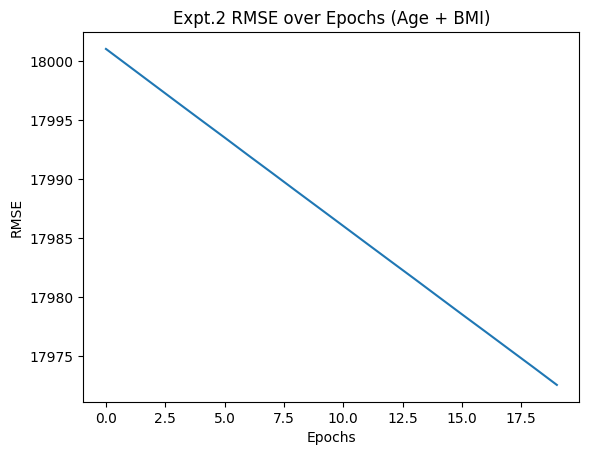

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


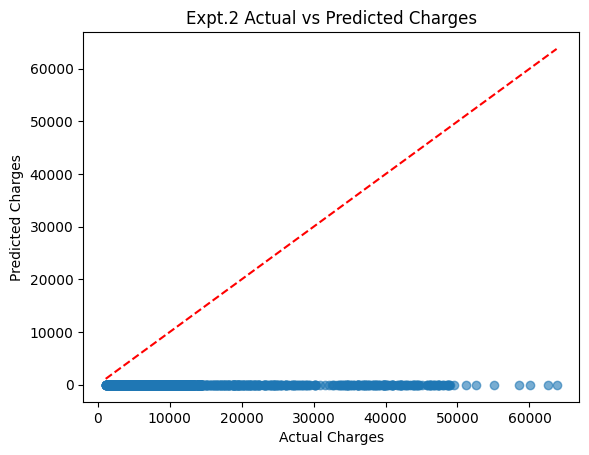

In [37]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# -----------------------------------
# Hyperparameters
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

label_name = 'charges'

# =================================================
# Experiment 1 (age only) → history_1
# =================================================
input_features_1 = ['age']

X1 = training_df[input_features_1].values
y = training_df[label_name].values

model_1 = create_model(input_dim=1)

model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

history_1 = model_1.fit(
    x=X1,
    y=y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# =================================================
# Experiment 2 (age + bmi) → history_2
# =================================================
input_features = ['age', 'bmi']

X = training_df[input_features].values   # shape: (n_samples, 2)

model_2 = create_model(input_dim=X.shape[1])

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

history_2 = model_2.fit(
    x=X,
    y=y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# -----------------------------------
# Plot RMSE vs Epochs (Experiment 2)
# -----------------------------------
plt.plot(history_2.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Expt.2 RMSE over Epochs (Age + BMI)')
plt.show()

# -----------------------------------
# Predictions
# -----------------------------------
predictions = model_2.predict(X).flatten()

# -----------------------------------
# Plot Actual vs Predicted
# -----------------------------------
plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Expt.2 Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


:') bmi alone isnt a good choice


expt 2 fw hyperparameters

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 322040768.0000 - rmse: 17945.4941   
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321986688.0000 - rmse: 17943.9883 
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321932832.0000 - rmse: 17942.4863 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321878976.0000 - rmse: 17940.9863 
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321825568.0000 - rmse: 17939.4980 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321771744.0000 - rmse: 17937.9980 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321717856.0000 - rmse: 17936.4941 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321664672.0000 - rmse: 17935.0117 
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321610240.0000 - rmse: 17933.4941 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321557632.0000 - rmse: 17932.0273
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321503264.0000 - rms

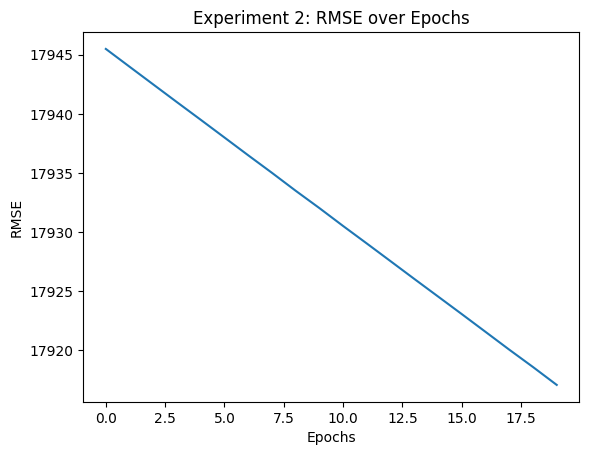

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


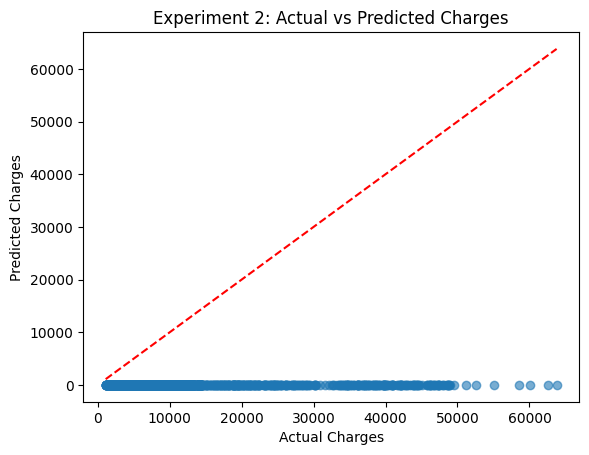

In [38]:
#@title Code - Experiment 2

import matplotlib.pyplot as plt
from tensorflow import keras

# -----------------------------------
# Hyperparameters (similar to ExperimentSettings)
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

input_features = ['age', 'bmi']   # Experiment 2: more than one feature
label_name = 'charges'

# -----------------------------------
# Prepare data
# -----------------------------------
X = training_df[input_features].values
y = training_df[label_name].values

# -----------------------------------
# Create model
# -----------------------------------
model_2 = create_model(input_dim=len(input_features))

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

# -----------------------------------
# Train model
# -----------------------------------
history_2 = model_2.fit(
    x=X,
    y=y,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# -----------------------------------
# Plot RMSE over epochs (ml_edu equivalent)
# -----------------------------------
plt.plot(history_2.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Experiment 2: RMSE over Epochs')
plt.show()

# -----------------------------------
# Plot predictions vs actual (ml_edu equivalent)
# -----------------------------------
predictions = model_2.predict(X).flatten()

plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Experiment 2: Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


expt 3 now with 3 features

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 323632064.0000 - rmse: 17989.7773   
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323577760.0000 - rmse: 17988.2656 
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323523104.0000 - rmse: 17986.7480 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323468512.0000 - rmse: 17985.2305
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323414144.0000 - rmse: 17983.7188 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323358752.0000 - rmse: 17982.1797
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323304416.0000 - rmse: 17980.6680 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323249440.0000 - rmse: 17979.1387
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323194848.0000 - rmse: 17977.6211 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323140000.0000 - rmse: 17976.0957 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323085920.0000 - rmse:

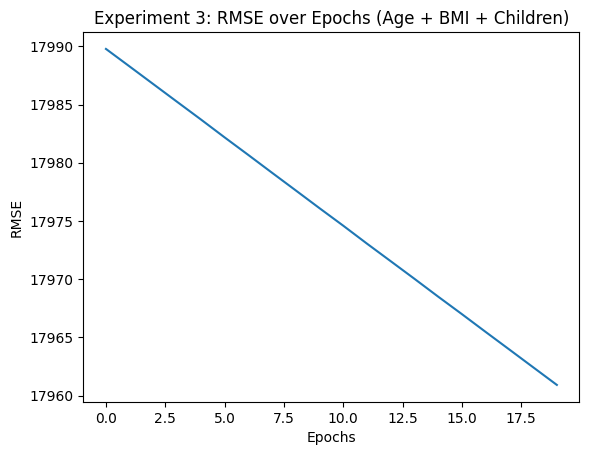

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


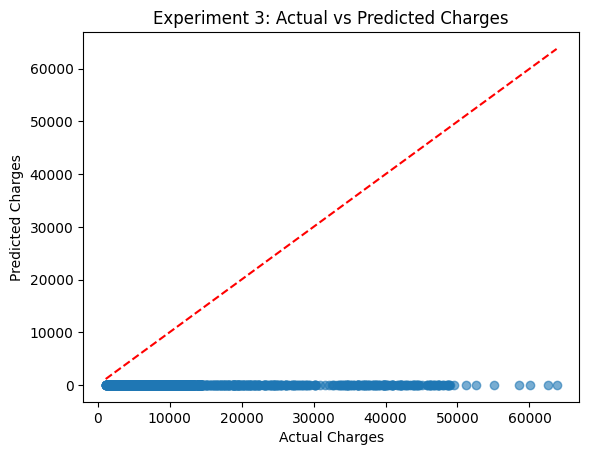

In [39]:
#@title Code - Experiment 3

import matplotlib.pyplot as plt
from tensorflow import keras

# -----------------------------------
# Hyperparameters (replacement for ExperimentSettings)
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

# Experiment 3: three features
input_features = ['age', 'bmi', 'children']
label_name = 'charges'

# -----------------------------------
# Prepare data
# -----------------------------------
X = training_df[input_features].values
y = training_df[label_name].values

# -----------------------------------
# Create model
# -----------------------------------
model_3 = create_model(input_dim=len(input_features))

model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

# -----------------------------------
# Train model
# -----------------------------------
history_3 = model_3.fit(
    x=X,
    y=y,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# -----------------------------------
# Plot RMSE over epochs (ml_edu equivalent)
# -----------------------------------
plt.plot(history_3.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Experiment 3: RMSE over Epochs (Age + BMI + Children)')
plt.show()

# -----------------------------------
# Plot predictions vs actual (ml_edu equivalent)
# -----------------------------------
predictions = model_3.predict(X).flatten()

plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Experiment 3: Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


compairing them

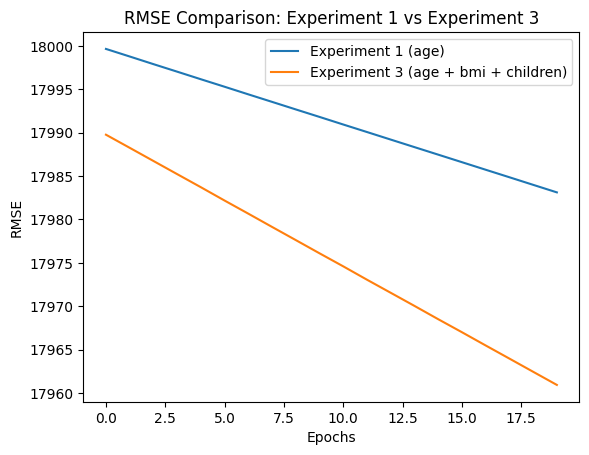

In [40]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['rmse'], label='Experiment 1 (age)')
plt.plot(history_3.history['rmse'], label='Experiment 3 (age + bmi + children)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE Comparison: Experiment 1 vs Experiment 3')
plt.legend()
plt.show()


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


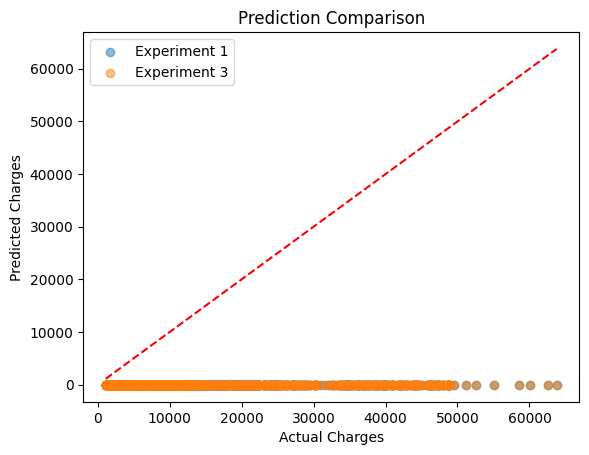

In [41]:
# Predictions
y_true = training_df['charges'].values

pred_1 = model_1.predict(training_df[['age']].values).flatten()
pred_3 = model_3.predict(training_df[['age', 'bmi', 'children']].values).flatten()

# Plot
plt.scatter(y_true, pred_1, alpha=0.5, label='Experiment 1')
plt.scatter(y_true, pred_3, alpha=0.5, label='Experiment 3')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Prediction Comparison')
plt.legend()
plt.show()


validation

In [45]:
#@title Code - Define functions to make predictions (Insurance Dataset)

import numpy as np
import pandas as pd

def format_currency(x):
    return "${:.2f}".format(x)

def build_batch(df, batch_size):
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

def predict_charges(model, df, features, label, batch_size=50):
    batch = build_batch(df, batch_size)

    # Prepare input the way YOUR Keras model expects
    X_batch = batch[features].values

    predicted_values = model.predict_on_batch(X_batch)

    data = {
        "PREDICTED_CHARGES": [],
        "OBSERVED_CHARGES": [],
        "L1_LOSS": [],
        features[0]: [],
        features[1]: []
    }

    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]

        data["PREDICTED_CHARGES"].append(format_currency(predicted))
        data["OBSERVED_CHARGES"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
    header = "-" * 80
    banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
    print(banner)
    print(output)
    return output


predictions

In [44]:
#@title Code - Make predictions

output = predict_charges(
    model=model_3,                 # your trained Experiment 3 model
    df=training_df,                # insurance dataset
    features=['age', 'bmi', 'children'],
    label='charges',
    batch_size=50
)

show_predictions(output)


--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_CHARGES OBSERVED_CHARGES    L1_LOSS  age    bmi
0              $3.08         $7261.74   $7258.67   41  34.20
1              $1.81        $34617.84  $34616.03   18  33.53
2              $2.49        $15820.70  $15818.21   38  19.30
3              $3.12         $9182.17   $9179.05   49  21.30
4              $3.55        $24873.38  $24869.83   53  22.61
5              $3.39        $10959.33  $10955.94   57  23.70
6              $3.55        $12129.61  $12126.07   59  28.79
7              $2.73         $6067.13   $6064.39   38  28.02
8              $1.99         $2219.45   $2217.46   18  37.29
9              $2.87         $7153.55   $7150.68   41  28.31
10             $1.89        $14571.89  $14570.00   24  20.52
11             $2.83     

,PREDICTED_CHARGES,OBSERVED_CHARGES,L1_LOSS,age,bmi
0,$3.08,$7261.74,$7258.67,41,34.20
1,$1.81,$34617.84,$34616.03,18,33.53
2,$2.49,$15820.70,$15818.21,38,19.30
3,$3.12,$9182.17,$9179.05,49,21.30
4,$3.55,$24873.38,$24869.83,53,22.61
5,$3.39,$10959.33,$10955.94,57,23.70
6,$3.55,$12129.61,$12126.07,59,28.79
7,$2.73,$6067.13,$6064.39,38,28.02
8,$1.99,$2219.45,$2217.46,18,37.29
9,$2.87,$7153.55,$7150.68,41,28.31
